# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

A. [Набор данных "Fashion MNIST"](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) `torchvision.datasets.FashionMNIST train=True и False`

B. [Набор данных "Текстуры"](https://pytorch.org/vision/main/generated/torchvision.datasets.DTD.html#torchvision.datasets.DTD) `torchvision.datasets.DTD split='train' и 'test'`

C. [Набор данных "Буквы"](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST) `torchvision.datasets.EMNIST split=letters train=True и False`

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

E. [Набор данных "Дорожные знаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.GTSRB.html) `torchvision.datasets.GTSRB split = 'train' и 'test'`


---

**Задача генерации текстов**

K. [Набор данных "Евгений Онегин"]() `onegin.txt`

L. [Набор данных "Война и Мир"]() `war_and_piece.txt`

M. [Набор данных "Стихи"]() `stihi.csv`

N. [Набор данных "Сказки"]() `fairytales.txt`

O. [Набор данных "Новости"]() `news.txt` или https://github.com/yutkin/Lenta.Ru-News-Dataset/releases

# 0. Инициализация библиотек

In [16]:
import numpy as np
import pandas as pd
import torch, torchvision 
from torch import nn 
from torch import optim 
from torchvision.transforms import ToTensor 
import torch.nn.functional as F 
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import copy
import re 


numb_batch = 64

Подсказка по разделению пород на два класса

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [17]:
dataset = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32,32)),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()                                
    ])
)

print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [31]:
test_size = 0.2 
nb_train = int((1.0 - test_size) * len(dataset))
nb_valid =  int(test_size * len(dataset))
train_dataset, test_dataset = torch.utils.data.dataset.random_split(dataset, [nb_train, nb_valid])
train_dl = torch.utils.data.DataLoader(train_dataset, batch_size = numb_batch)
test_dl = torch.utils.data.DataLoader(test_dataset, batch_size = numb_batch)

## 1.2 Предобработка данных (по необходимости)

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [13]:
model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(35344, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )

## 1.4 Обучение сввёрточной нейронной сети для решения задачи классификации

In [18]:
def train(model, numb_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = model.to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    for epoch in range(numb_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, test_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
        print('Эпоха:', epoch+1,' из ',numb_epoch, "Текущая точность :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
        s = 0
        i = 0
    for elem in np.array(y_true):
        if np.array(y_true)[i] == np.array(y_pred)[i]:
            s = s + 1
            i = i + 1
    print("Точность на тестовых данных достигла ", s/len(np.array(y_pred))*100,"%" )
    return np.array(y_pred), np.array(y_true)

def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

device = torch.device("cuda:0")

Эпоха: 1  из  10 Текущая точность : 85.98332977294922 %
Эпоха: 2  из  10 Текущая точность : 87.31666564941406 %
Эпоха: 3  из  10 Текущая точность : 87.9749984741211 %
Эпоха: 4  из  10 Текущая точность : 88.38333129882812 %
Эпоха: 5  из  10 Текущая точность : 88.44999694824219 %
Эпоха: 6  из  10 Текущая точность : 89.23332977294922 %
Эпоха: 7  из  10 Текущая точность : 89.32499694824219 %
Эпоха: 8  из  10 Текущая точность : 89.58333587646484 %
Эпоха: 9  из  10 Текущая точность : 89.82499694824219 %
Эпоха: 10  из  10 Текущая точность : 90.0250015258789 %


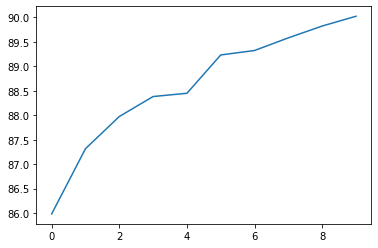

In [35]:
model = train(model, 10, device = device)

## 1.5 Агументация данных и регулряизации нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [19]:
dataset_augm = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32,32)),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomResizedCrop(size=(60, 60), scale=(0.08, 1.0), ratio=(0.5, 2.0)),
    torchvision.transforms.Resize((32,32)),
    torchvision.transforms.ToTensor()                                 
    ])
)

In [20]:
test_size = 0.2 
nb_train = int((1.0 - test_size) * len(dataset_augm))
nb_valid =  int(test_size * len(dataset_augm))
train_dataset, test_dataset = torch.utils.data.dataset.random_split(dataset_augm, [nb_train, nb_valid])
train_dl = torch.utils.data.DataLoader(train_dataset_a, batch_size = numb_batch)
test_dl = torch.utils.data.DataLoader(train_dataset_a, batch_size = numb_batch)

In [21]:
model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(), nn.Dropout(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(), nn.Dropout(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(576, 120),
        nn.ReLU(), 
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )

## 1.6 Обучение нейросети на данных с аугументацией 

Эпоха: 1  из  40 Текущая точность : 26.879167556762695 %
Эпоха: 2  из  40 Текущая точность : 29.618749618530273 %
Эпоха: 3  из  40 Текущая точность : 30.82291603088379 %
Эпоха: 4  из  40 Текущая точность : 34.21666717529297 %
Эпоха: 5  из  40 Текущая точность : 37.01874923706055 %
Эпоха: 6  из  40 Текущая точность : 37.75 %
Эпоха: 7  из  40 Текущая точность : 40.15833282470703 %
Эпоха: 8  из  40 Текущая точность : 41.20000076293945 %
Эпоха: 9  из  40 Текущая точность : 41.52708435058594 %
Эпоха: 10  из  40 Текущая точность : 42.14583206176758 %
Эпоха: 11  из  40 Текущая точность : 42.19166564941406 %
Эпоха: 12  из  40 Текущая точность : 43.016666412353516 %
Эпоха: 13  из  40 Текущая точность : 42.875 %
Эпоха: 14  из  40 Текущая точность : 43.12083435058594 %
Эпоха: 15  из  40 Текущая точность : 43.59583282470703 %
Эпоха: 16  из  40 Текущая точность : 43.422916412353516 %
Эпоха: 17  из  40 Текущая точность : 43.87916564941406 %
Эпоха: 18  из  40 Текущая точность : 44.51874923706055 %
Эп

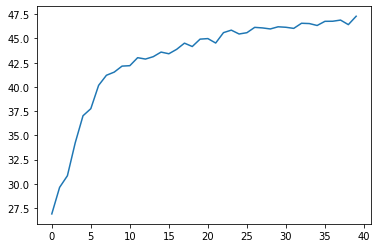

In [22]:
model = train(model, 40, device = device)

## 1.7 Выводы

Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

# 2. Рекуррентная нейронная сеть для генерации текстов (9 баллов)

## 2.1 Загрузка данных



In [112]:
import sys
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint


data = pd.read_csv("M_stihi.csv", encoding = "utf-8")

# убираем столбец автор
data.pop('author')
data.head()

,text
0,\r\nДетки мои Живите неспеша чтоб пела ...
1,Каждый по своему проводит свою ночь\r\nКто спи...
2,Нежно так я словами касался предплечий\r\nИх ...
3,Ты как всегда меня поймешь\r\nИ как всегда ...
4,Укусить бы кого нибудь больно\r\nиль повыть п...


## 2.2 Преодбработка/нормализация данных по необходимости

Например, можно привести все слова к нижнему регистру

In [113]:
data_lower = []

for row in data['text']:
    # Заменяем перевод строки на пробелы
    row = row.replace('\r\n', ' ')\
    
    # Приводим к нижнему регистру
    row = row.lower()
    data_lower.append(row)
    
# data = data_lower

print(data_lower[10])

сердце снова замерло в тревоге мысли толпами проносятся в мозгу кажется опять ты на обочине дороги кажется что всё  я больше не могу снова от тебя удача ускользает как сквозь пальцы сыплется песок почему же сердце так страдает ведь ещё не вышел жизни срок жизнь  она дана нам  чтобы жить жить  чтобы душою чище стать жить  чтоб быть любимым и любить чтоб ни что по жизни не терять не теряя тех  кто дорог вам и мил не теряя тех  что очень любишь ты и дай бог чтоб каждый так же жил смерть не стоит даже мизерной мечты


In [114]:
# Получаем все буквы из текста
char_set = set()

for poem in data_lower:
    for char in poem:
        char_set.add(char)
        
char_set.add('|')
        
def tokenize_words():
    stroka =''
    for row in data_lower:
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(row)
        stroka = stroka + " ".join(tokens)
    return stroka

processed_inputs = tokenize_words()

tokens = sorted(char_set)
print(tokens)
print('\n')

# Составляем словарь для идентификации букв.
token_to_id = {char: i for i, char in enumerate(tokens)}
print(token_to_id)
print('\n')

id_to_token = {i: char for i, char in enumerate(tokens)}
print(id_to_token)
print('\n')


['\t', '\x0b', ' ', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', 'µ', 'ß', 'á', 'ä', 'ó', 'ö', 'ü', 'ý', 'š', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'ђ', 'ѓ', 'є', 'ѕ', 'і', 'ї', 'ј', 'љ', 'њ', 'ћ', 'ќ', 'ў', 'џ', 'ґ']


{'\t': 0, '\x0b': 1, ' ': 2, '_': 3, 'a': 4, 'b': 5, 'c': 6, 'd': 7, 'e': 8, 'f': 9, 'g': 10, 'h': 11, 'i': 12, 'j': 13, 'k': 14, 'l': 15, 'm': 16, 'n': 17, 'o': 18, 'p': 19, 'q': 20, 'r': 21, 's': 22, 't': 23, 'u': 24, 'v': 25, 'w': 26, 'x': 27, 'y': 28, 'z': 29, '|': 30, 'µ': 31, 'ß': 32, 'á': 33, 'ä': 34, 'ó': 35, 'ö': 36, 'ü': 37, 'ý': 38, 'š': 39, 'а': 40, 'б': 41, 'в': 42, 'г': 43, 'д': 44, 'е': 45, 'ж': 46, 'з': 47, 'и': 48, 'й': 49, 'к': 50, 'л': 51, 'м': 52, 'н': 53, 'о': 54, 'п': 55, 'р': 56, 'с': 57, 'т': 58, 'у': 59, 'ф': 60, 'х': 61, 'ц': 

In [115]:
data['text'] = data_lower

## 2.3 Инициализация объекта рекуррентной нейронной сети

In [116]:
from collections import Counter

class Dataset(torch.utils.data.Dataset):
    def __init__(self, data, token_to_id, max_sent_len):
        self.sentences = data['text'].values
        self.token_to_id = token_to_id
        self.vocab_size = len(token_to_id)
        self.max_sent_len = max_sent_len

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx][:self.max_sent_len]
        idxs = [self.token_to_id[c] for c in sentence]

        return idxs

def collate_fn(batch):
    captions = get_padded(batch) 

    return torch.tensor(captions, dtype=torch.long)

def get_padded(inputs): 
    max_len = max(map(len, inputs)) + 1

    padded = np.array([input + [token_to_id['|']]*(max_len-len(input)) for input in inputs])
    return padded

In [117]:
dataset = Dataset(data, token_to_id, max_sent_len=64)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, collate_fn=collate_fn, drop_last=True)

In [118]:
from torch import nn

class Model(nn.Module):
    def __init__(self, dataset):
        super(Model, self).__init__()
        self.rnn_hidden_dim = 2048
        self.embedding_dim = 512
        self.num_layers = 2

        n_vocab = dataset.vocab_size

        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=self.embedding_dim,
            padding_idx=token_to_id['|']
        )

        self.rnn = nn.RNN(
            input_size=self.embedding_dim,
            hidden_size=self.rnn_hidden_dim,
            num_layers=self.num_layers,
            dropout=0.2,
            batch_first=True
        )

        self.fc = nn.Linear(self.rnn_hidden_dim, n_vocab)

    def forward(self, x, prev_state):
        embed = self.embedding(x)
        output, state = self.rnn(embed, prev_state)
        logits = self.fc(output)
        return logits, state

    def init_state(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.rnn_hidden_dim).cuda()

model = Model(dataset).cuda()

## 2.4 Обучение обычной рекуррентной нейронной сети

In [119]:
import argparse
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader

In [120]:
def train(model):
    model.train()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    loss_history = []

    for epoch in range(3):
        state_h = model.init_state(dataloader.batch_size)

        for batch, x in enumerate(dataloader):
            optimizer.zero_grad()

            y_pred, state_h = model(x.cuda(), state_h)
            y_pred = y_pred[:, :-1, :].contiguous()

            loss = criterion(y_pred.view(-1, y_pred.size(-1)), x[:, 1:].contiguous().cuda().view(-1))

            state_h = state_h.detach()
            loss_history.append(loss.item())

            loss.backward()
            optimizer.step()

            if batch % 100 == 0:
                print({ 'epoch': epoch+1, 'batch': batch, 'loss': loss.item()})
    
    return loss_history

In [121]:
loss_history = train(model)

{'epoch': 1, 'batch': 0, 'loss': 4.477314472198486}
{'epoch': 1, 'batch': 100, 'loss': 2.1472859382629395}
{'epoch': 1, 'batch': 200, 'loss': 2.0363857746124268}
{'epoch': 1, 'batch': 300, 'loss': 1.9298828840255737}
{'epoch': 1, 'batch': 400, 'loss': 1.886730432510376}
{'epoch': 1, 'batch': 500, 'loss': 1.876570463180542}
{'epoch': 1, 'batch': 600, 'loss': 1.7896223068237305}
{'epoch': 1, 'batch': 700, 'loss': 1.7610969543457031}
{'epoch': 1, 'batch': 800, 'loss': 1.7572237253189087}
{'epoch': 1, 'batch': 900, 'loss': 1.7292702198028564}
{'epoch': 1, 'batch': 1000, 'loss': 1.7233959436416626}
{'epoch': 1, 'batch': 1100, 'loss': 1.6893641948699951}
{'epoch': 1, 'batch': 1200, 'loss': 1.7385072708129883}
{'epoch': 1, 'batch': 1300, 'loss': 1.6564233303070068}
{'epoch': 1, 'batch': 1400, 'loss': 1.7112618684768677}
{'epoch': 1, 'batch': 1500, 'loss': 1.6292232275009155}
{'epoch': 1, 'batch': 1600, 'loss': 1.7070653438568115}
{'epoch': 1, 'batch': 1700, 'loss': 1.667055606842041}
{'epoch'

## 2.5 Генерация текстов при помощи обычной рекуррентной сети

In [122]:
import torch.nn.functional as F


def generate_sample(model, seed_phrase=' ', max_length=100, temperature=1):
    model.eval()
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64).cuda()
    hid_state = model.init_state(1).cuda()
    for i in range(len(seed_phrase) - 1):
        _, hid_state = model(x_sequence[:, i], hid_state.squeeze(1))
    for _ in range(max_length - len(seed_phrase)):
        output, hid_state = model(x_sequence[:, -1], hid_state.squeeze(1))

        p_next = F.softmax(output / temperature, 1).data.cpu().numpy()[0]
        next_ix = np.random.choice(len(token_to_id), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64).cuda()
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([id_to_token[ix] for ix in x_sequence.cpu().data.numpy()[0]])

In [123]:
for _ in range(3):
    print(generate_sample(model, seed_phrase='и', max_length=64))

идёшь не ха егодна для тского я остановятся осени истину  как зн
иться с тобой не потущить ненависти потихоньку тебя подар|те ест
из гостисты и от ради мечты прибоя назван  прожил|если эдре|любо


In [124]:
for _ in range(3):
    print(generate_sample(model, seed_phrase='весна ', max_length=64))

весна  который свет лимон|иногда я пишу не брать  подобно к но| 
весна и поивает пото| своё |есть в|елях мир на успех идёт под ро
весна укрыться любовь мне может быть по имя на крови містики сте


## 2.6 Обучение рекуррентной нейронной сети с LSTM-ячейками

In [125]:
class LSTM(nn.Module):
    def __init__(self, dataset):
        super(LSTM, self).__init__()
        self.rnn_hidden_dim = 2048
        self.embedding_dim = 512
        self.num_layers = 2

        n_vocab = dataset.vocab_size

        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=self.embedding_dim,
            padding_idx=token_to_id['|']
        )

        self.rnn = nn.LSTM(
            input_size=self.embedding_dim,
            hidden_size=self.rnn_hidden_dim,
            num_layers=self.num_layers,
            dropout=0.2,
            batch_first=True
        )

        self.fc = nn.Linear(self.rnn_hidden_dim, n_vocab)

    def forward(self, x, prev_state):
        embed = self.embedding(x)
        output, state = self.rnn(embed, prev_state)
        logits = self.fc(output)
        return logits, state

    def init_state(self, batch_size):
        return (torch.zeros(self.num_layers, batch_size, self.rnn_hidden_dim),
                torch.zeros(self.num_layers, batch_size, self.rnn_hidden_dim))

lstm_model = LSTM(dataset).cuda()

In [126]:
def train_lstm(model):
    model.train()

    criterion = nn.CrossEntropyLoss(ignore_index=token_to_id['|'])
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    loss_history = []

    for epoch in range(1):
        state_h, state_c = model.init_state(dataloader.batch_size)
        state = state_h.cuda(), state_c.cuda()


        for batch, x in enumerate(dataloader):
            optimizer.zero_grad()

            y_pred, state = model(x.cuda(), state)
            y_pred = y_pred[:, :-1, :].contiguous()

            loss = criterion(y_pred.view(-1, y_pred.size(-1)), x[:, 1:].contiguous().cuda().view(-1))

            state_h, state_c = state
            state = state_h.detach(), state_c.detach()
            loss_history.append(loss.item())

            loss.backward()
            optimizer.step()

            if batch % 1000 == 0:
                print({ 'epoch': epoch+1, 'batch': batch, 'loss': loss.item()})
    
    return loss_history

In [129]:
loss_history_lstm = train_lstm(lstm_model)

{'epoch': 1, 'batch': 0, 'loss': 4.458916187286377}
{'epoch': 1, 'batch': 1000, 'loss': 1.5625067949295044}
{'epoch': 1, 'batch': 2000, 'loss': 1.4905141592025757}


## 2.7 Генерация текстов с разной температурой

Попробуйте сгенерировать тексты с температурой из списка: `[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]` (см. нотубук с семинара по RNN)

In [130]:
def generate_sample(model, seed_phrase=' ', max_length=100, temperature=1):
    model.eval()
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64).cuda()
    state_h, state_c = model.init_state(1)
    state = state_h.squeeze(1).cuda(), state_c.squeeze(1).cuda()
    
    for i in range(len(seed_phrase) - 1):
        _, state = model(x_sequence[:, i], state)
    
    for _ in range(max_length - len(seed_phrase)):
        output, state = model(x_sequence[:, -1], state)


        p_next = F.softmax(output / temperature, 1).data.cpu().numpy()[0]

        next_ix = np.random.choice(len(token_to_id), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64).cuda()
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)

        
    return ''.join([id_to_token[ix] for ix in x_sequence.cpu().data.numpy()[0]])

In [131]:
for t in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    print(f"Температура {t}")
    for _ in range(2):
        print(generate_sample(lstm_model, seed_phrase='сердце ', max_length=64, temperature=t))
    for _ in range(2):
        print(generate_sample(lstm_model, seed_phrase='привет ', max_length=64, temperature=t))
    for _ in range(2):
        print(generate_sample(lstm_model, seed_phrase='весна ', max_length=64, temperature=t))
    print()

Температура 0.1
сердце                                                          
сердце                                                          
привет                                                          
привет                                                          
весна                                                           
весна                                                           

Температура 0.2
сердце   в котором мне не станет себя                           
сердце стало по просторам старинной старый снег                 
привет                                                          
привет                                                          
весна                                                           
весна                                                           

Температура 0.4
сердце под строкой на стекле в одном а в доме   за привычку в те
сердце     походка на луну  собчак по прежнему   не просто  но н
привет  не заметил  а ты не просто найдё

## 2.8 Выводы

In [ ]:
Составить из букв слова более менее получилось, но составить из слов осмысленный текст - нет. 
Наверно это связано с размера датасета и времненем обучения.